## Machine Learning with KNearest Neibhors

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [21]:
#data
df=pd.read_csv('data/KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
scaled_feats=scaler.fit_transform(df.drop('TARGET CLASS',axis=1))

## Model Building

In [28]:
from sklearn.model_selection import train_test_split

trainX,testX,trainY,testY=train_test_split(scaled_feats,df['TARGET CLASS'],test_size=0.3,random_state=101)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(trainX,trainY)
pred=knn.predict(testX)

### Metrics

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('confusion matrix :\n',confusion_matrix(testY,pred))
print('classification report: \n',classification_report(testY,pred))

confusion matrix :
 [[109  43]
 [ 41 107]]
classification report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



## Choosing K value

In [65]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(trainX,trainY)
    pred=knn.predict(testX)
    #error_rate.append(accuracy_score(testY,pred))
    error_rate.append(np.mean(pred!=testY))

Text(0,0.5,'error rate')

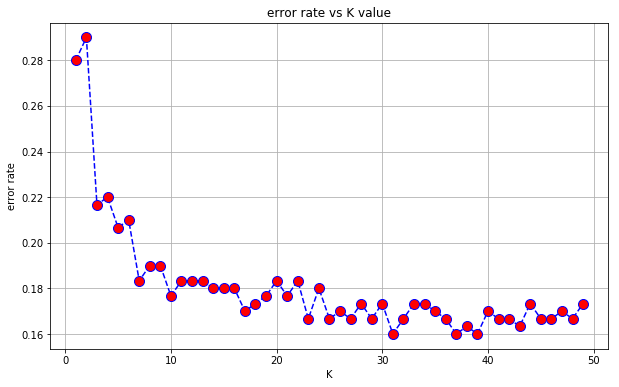

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,linestyle='dashed',marker='o',markersize=10,color='blue',markerfacecolor='red')
plt.grid()
plt.title('error rate vs K value')
plt.xlabel('K')
plt.ylabel('error rate')

## Final training model

In [68]:
#retraining with new K value
knn=KNeighborsClassifier(n_neighbors=31)
knn.fit(trainX,trainY)
pred=knn.predict(testX)

print('confusion matrix :\n',confusion_matrix(testY,pred))
print('classification report: \n',classification_report(testY,pred))

confusion matrix :
 [[123  29]
 [ 19 129]]
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

